In [312]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. 데이터 로드

In [313]:
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [314]:
# dataset 확인: 결측치 항목 여부 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [315]:
# 필요한 컬럼 추리기
df.drop(columns=['Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,994.7052


In [316]:
# 결측치 확인: Item_Weight          
df.isnull().sum()

Item_Identifier         0
Item_Weight          1463
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Item_Outlet_Sales       0
dtype: int64

In [317]:
# Item_Type별 Item_Weight 추출
#   평균값의 차이가 크지 않은 것으로 보아 전체 항목의 평균값을 NaN값에 기재
df.groupby('Item_Type')[['Item_Weight']].mean()

,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [318]:
item_weight_mean = df.Item_Weight.mean()

In [319]:
item_weight = df.Item_Weight.fillna(item_weight_mean, inplace=True)
item_weight

#### 2. 시각화를 통한 각 feature별 target과 상관관계 비교

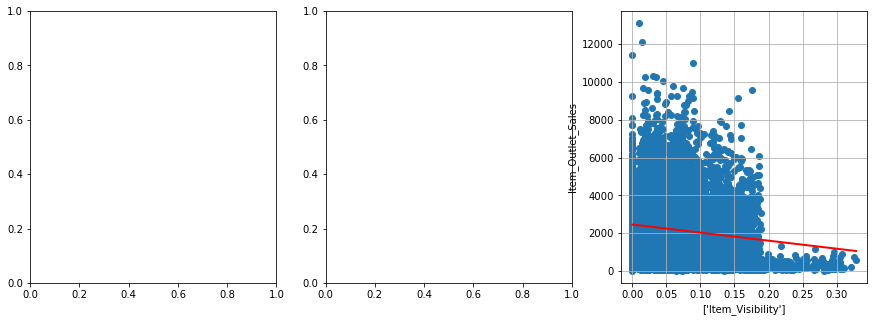

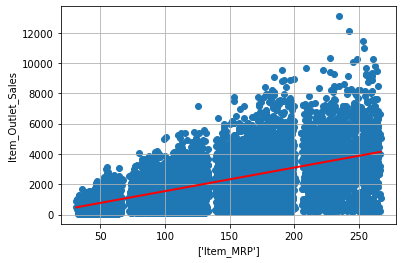

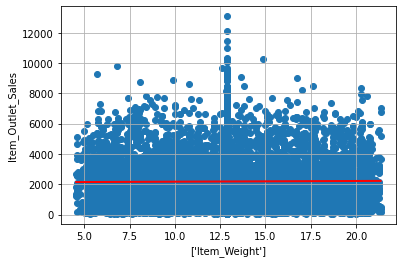

In [331]:
cols = ['Item_Visibility', 'Item_MRP', 'Item_Weight']

_, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, feature in enumerate(df[cols]):
    weight, bias = np.polyfit(df[feature], df.Item_Outlet_Sales, 1)

    xs = np.array([df[feature].min(), df[feature].max()])
    ys = xs * weight + bias

    row, col = i//3, i%3
    plt.scatter(df[feature], df.Item_Outlet_Sales)
    plt.plot(xs, ys, lw=2, color='r')
    plt.grid()
    plt.xlabel([feature])
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

#### 3. 선형회귀 모델을 이용하여 상관관계 정도 확인: 훈련, 테스트

- 훈련

In [348]:
from sklearn.linear_model import LinearRegression

cols = ['Item_Visibility', 'Item_MRP', 'Item_Weight']
y = df.Item_Outlet_Sales

for feature in df[cols]:
    X = df[feature].values.reshape(-1,1)
    lr = LinearRegression()
    lr.fit(X, y)
    score = lr.score(X, y)
    print(f'{feature}:\t{score:.4f}')

Item_Visibility:	0.0165
Item_MRP:	0.3221
Item_Weight:	0.0001


- 테스트

In [351]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

for feature in df[cols]:
    X_train, X_test, y_train, y_test = train_test_split(
        df[feature].values.reshape(-1,1), 
        y, test_size=0.1, random_state=2021
    )

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    score = lr.score(X_test, y_test) 
    mse_lr = mean_squared_error(y_test, pred)

    print(f'예측값: {score: .4f}, MSE: {mse_lr: .4f}')


예측값:  0.0163, MSE:  2705019.0851
예측값:  0.3577, MSE:  1766126.2593
예측값:  0.0001, MSE:  2749537.3684
